# Importing Necessary Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
#loaidng the data
df_train = pd.read_csv('C:\\Users\\smust\\BIG_MART_PROJECT\\train.csv')

In [34]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
#info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [36]:
#checking the null values
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

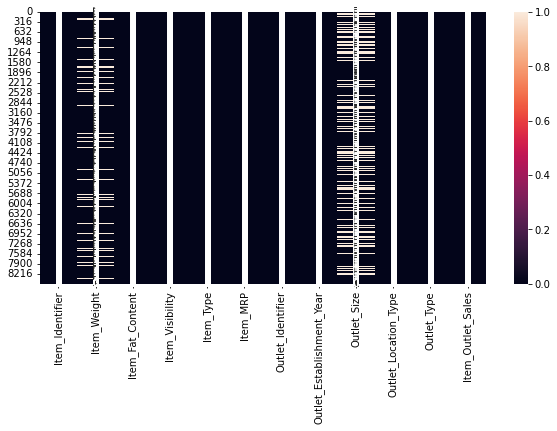

In [37]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_train.isnull(), annot = True)
plt.show()

In [38]:
plt.savefig('correlation.png')

<Figure size 432x288 with 0 Axes>

C:\Users\smust\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


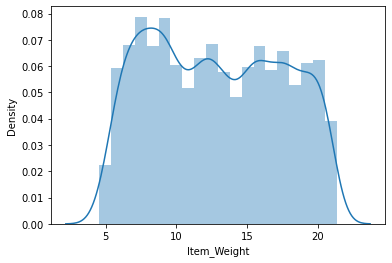

C:\Users\smust\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


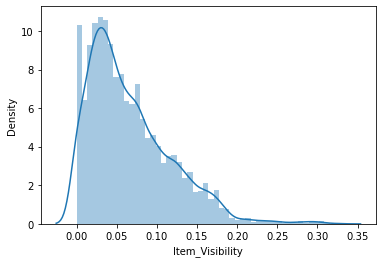

C:\Users\smust\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


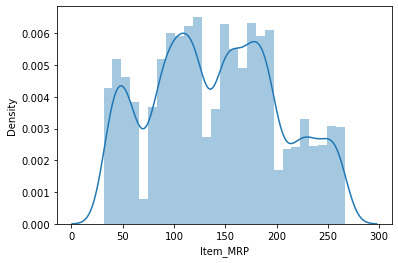

C:\Users\smust\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


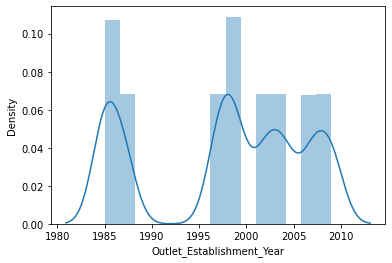

C:\Users\smust\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


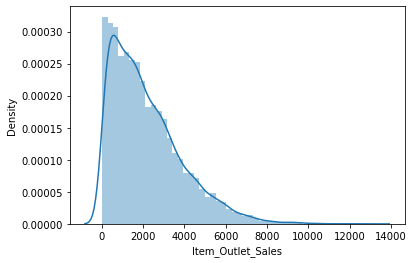

In [20]:
for i in df_train.describe().columns:
    sns.distplot(df_train[i])
    plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


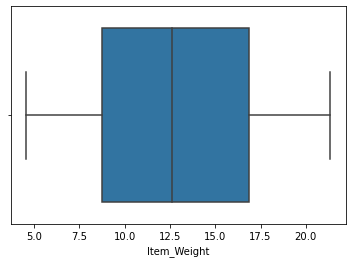

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


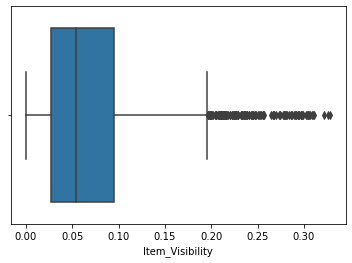

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


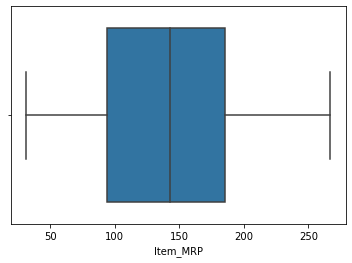

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


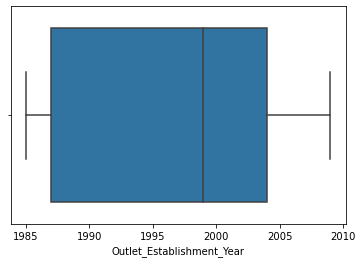

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


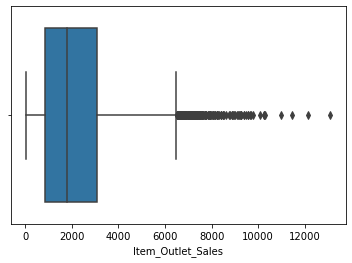

In [7]:
#checking the outliers
for i in df_train.describe().columns:
    sns.boxplot(df_train[i])
    plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


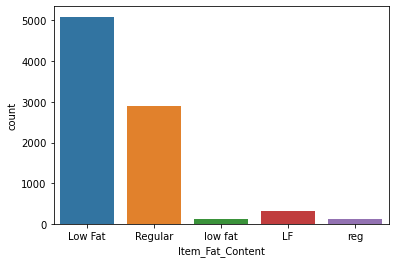

In [8]:
sns.countplot(df_train['Item_Fat_Content'])
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


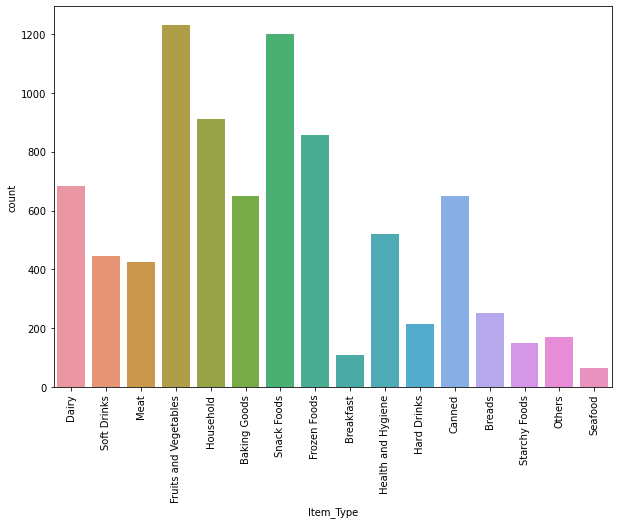

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(df_train['Item_Type'])
plt.xticks(rotation = 90)
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


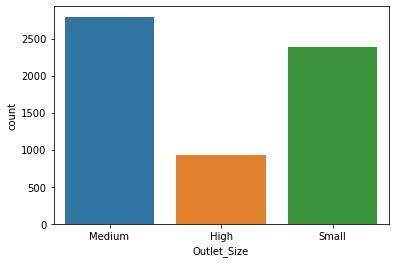

In [10]:
sns.countplot(df_train['Outlet_Size'])
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


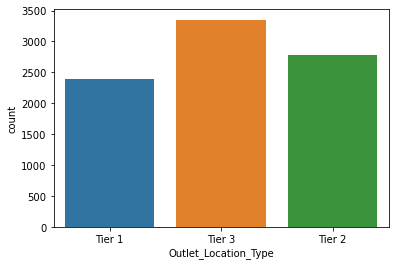

In [11]:
sns.countplot(df_train['Outlet_Location_Type'])
plt.show()

C:\Users\smust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


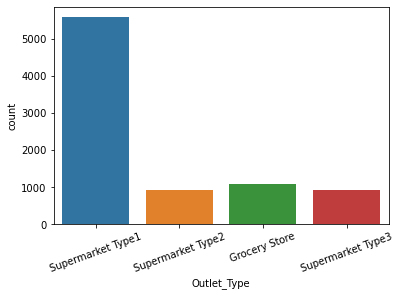

In [12]:
sns.countplot(df_train['Outlet_Type'])
plt.xticks(rotation = 20)
plt.show()

In [13]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


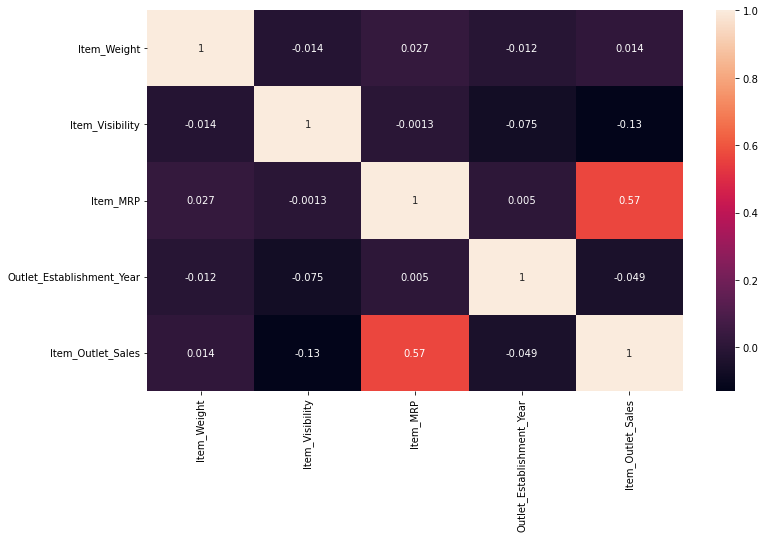

In [19]:
#showing the correlation
plt.figure(figsize = (12, 7))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

# Data Cleaning

In [15]:
df_train['Item_Weight'].mean()

12.857645184136183

In [16]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [17]:
#replacing the null values in Item_Weight by mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace = True)

In [18]:
#replacing the null values in Outlet_Size by mode
df_train['Outlet_Size'].fillna('Medium', inplace=True)

In [19]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
#finding the outliers in Item_Visibility
outliers = []
def detect_outliers(df_train):
    df_train = sorted(df_train)
    q1 = np.percentile(df_train, 25)
    q3 = np.percentile(df_train, 75)
    IQR = q3 - q1
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    for i in df_train:
        if i<lower or i>upper:
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers(df_train['Item_Visibility'])
print(sample_outliers)

[0.196438668, 0.196490902, 0.196659953, 0.19780911, 0.198316649, 0.198424841, 0.19875618, 0.19899855, 0.199935881, 0.199955274, 0.2004264, 0.20168772, 0.203510667, 0.2047, 0.204713036, 0.204984538, 0.205294827, 0.205484395, 0.205605116, 0.207783483, 0.208162156, 0.208397715, 0.208662546, 0.208987123, 0.20914265, 0.209162936, 0.209600084, 0.210021713, 0.210375806, 0.210511558, 0.210596485, 0.211306673, 0.211539389, 0.212293753, 0.212963193, 0.213125482, 0.21332355, 0.214125129, 0.214139786, 0.214306131, 0.214423791, 0.214681063, 0.21561193, 0.216107535, 0.216323008, 0.216478153, 0.21799414, 0.220111117, 0.220225608, 0.221856492, 0.222063351, 0.223440258, 0.223985293, 0.22417463, 0.224607399, 0.224837308, 0.225476528, 0.226122963, 0.226284381, 0.227189581, 0.227260689, 0.228469522, 0.228993134, 0.232072674, 0.23212188, 0.233039817, 0.233356571, 0.234733477, 0.235183205, 0.235354055, 0.235859408, 0.236433601, 0.23653561, 0.236616754, 0.237651344, 0.238366442, 0.238831875, 0.240268248, 0.2

In [22]:
#replacing the outliers with mean
mean = df_train['Item_Visibility'].mean()
mean

0.06613202877895127

In [23]:
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(sample_outliers, mean)

In [24]:
#checking the zeros
df_train[df_train['Item_Visibility'] == 0]['Item_Visibility'].count()

526

In [25]:
#replacing the zeros with mean
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0, df_train['Item_Visibility'].mean())
df_train[df_train['Item_Visibility'] == 0]['Item_Visibility'].count()

0

# Feature Engineering

In [26]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
#removing the spelling mistakes
df_train = df_train.replace({'Item_Fat_Content' : {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}})

In [28]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
#creating new column from Item_Identifier
df_train['New_Item_Type'] = df_train['Item_Identifier'].apply(lambda x: x[:2])

In [30]:
df_train = df_train.replace({'New_Item_Type':{'FD':'Food', 'DR':'Drinks', 'NC':'Non-Consumables'}})

In [31]:
#subtracting the year from 2013
df_train['Outlet_Year'] = 2013 - df_train['Outlet_Establishment_Year']

In [32]:
#dropping the particular columns
df_train.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year'], axis = 1, inplace=True)

Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df_train = df_train.apply(le.fit_transform)

In [35]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,284,0,663,5592,9,1,0,1,2540,1,4
1,57,1,879,473,3,1,2,2,422,0,0
2,376,0,714,2901,9,1,0,1,1639,1,4
3,393,1,4254,4227,0,1,2,0,670,1,5
4,265,0,4254,627,1,0,2,1,865,2,7
...,...,...,...,...,...,...,...,...,...,...,...
8518,125,0,3911,4955,1,0,2,1,2047,1,7
8519,233,1,3277,2023,7,1,1,1,516,1,3
8520,299,0,2301,1263,6,2,1,1,1018,2,2
8521,149,1,7176,1857,3,1,2,2,1466,1,0


In [36]:
#create dummies for avoiding confusion
df_train = pd.get_dummies(df_train, columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])

In [37]:
df_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,284,663,5592,9,2540,4,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,57,879,473,3,422,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
2,376,714,2901,9,1639,4,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,393,4254,4227,0,670,5,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
4,265,4254,627,1,865,7,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,125,3911,4955,1,2047,7,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
8519,233,3277,2023,7,516,3,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
8520,299,2301,1263,6,1018,2,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,149,7176,1857,3,1466,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [38]:
x = df_train.drop(['Item_Outlet_Sales'], axis = 1)
y = df_train['Item_Outlet_Sales']

# Model Building

In [39]:
#splitting the data for training and testing for model prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 101)

XGBRegressor

In [40]:
from xgboost import XGBRegressor
xg = XGBRegressor(max_depth = 2)

In [41]:
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [42]:
xg_train_Pred = xg.predict(x_train)

In [43]:
r2_train = metrics.r2_score(y_train, xg_train_Pred)
r2_train

0.6891008821755957

In [44]:
xg_test_pred = xg.predict(x_test)

In [45]:
r2_test = metrics.r2_score(y_test, xg_test_pred)
r2_test

0.64774785520827

RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000,max_depth=6, min_samples_leaf=41,n_jobs=4)

In [47]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=41, n_estimators=1000,
                      n_jobs=4)

In [48]:
rf_train_pred = rf.predict(x_train)

In [49]:
r2_train = metrics.r2_score(y_train, rf_train_pred)
r2_train

0.6723974536460023

In [50]:
rf_test_pred = rf.predict(x_test)

In [51]:
r2_test = metrics.r2_score(y_test, rf_test_pred)
r2_test

0.6541931669275242

DecisionTreeRegressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 5)

In [53]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [54]:
tree_train_pred = tree.predict(x_train)

In [55]:
r2_train = metrics.r2_score(y_train, tree_train_pred)
r2_train

0.6633858098650883

In [56]:
tree_test_pred = tree.predict(x_test)

In [57]:
r2_test = metrics.r2_score(y_test, tree_test_pred)
r2_test

0.6480922803420182

# Cross Validation

StratifiedKFold

In [208]:
seed = 342
np.random.seed(seed)

In [209]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=None)

In [210]:
params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'gamma': [0, 0.5, 1],
    'n_estimators': [50,100,150,200],
    'learning_rate': [0.5, 0.75, 1], 
}

In [211]:
from xgboost.sklearn import XGBRegressor 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [212]:
x = df_train.drop(['Item_Outlet_Sales'], axis = 1)
y = df_train['Item_Outlet_Sales']

In [213]:
from sklearn.model_selection import StratifiedKFold

In [214]:
xgf=XGBRegressor()

In [215]:
gxgf=GridSearchCV(xgf, params)

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=0)

In [217]:
x_train=np.array(x_train) 

In [218]:
y_train=np.array(y_train) 

In [219]:
x_train = x_train.astype(float) 

In [220]:
y_train = y_train.astype(float)

In [221]:
gxgf

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None,

In [222]:
gxgf.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None,

In [223]:
original_values=y_test

In [224]:
test_x=np.array(x_test)

In [225]:
test_x=test_x.astype(float)

In [226]:
predicted=gxgf.predict(test_x)

In [227]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(original_values, predicted))

In [228]:
print(rms)

555.3858556938976
